CS401[A]- CA2 
PRIYANKABEN KANAKSINH SOLANKI
ID : 25253574

Differentiated Thyroid Cancer Recurrence.

# Task 1 -  Understanding the Data



**(a) Description of Dataset**


**Description :**

The dataset contains clinical and pathological information of patients diagnosed with differentiated thyroid cancer (DTC). It is designed to study and predict cancer recurrence after initial treatment.Each record represents an individual patient and includes demographic details, tumor characteristics, treatment-related factors.

**Features:**

The dataset includes patient-related, clinical and pathological features like Age, Gender, Smoking, Hx Smoking, Hx Radiothreapy, Thyroid Function, Physical Examination, Adenopathy, Pathology, Focality, Risk, Tumor Stage, Nodal Stage, Metastasis Stage, Response, Recurred.

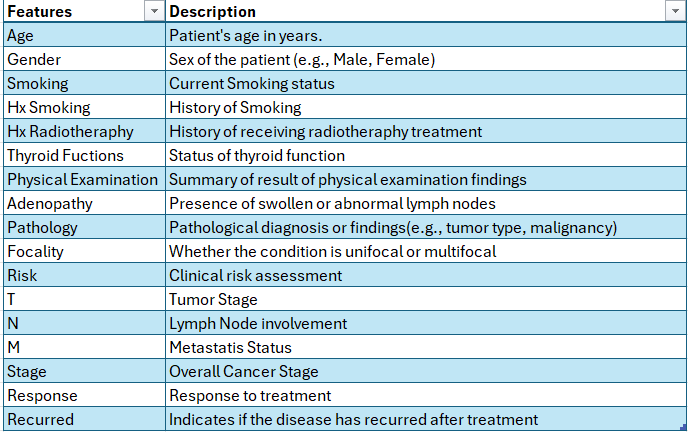

**Instances  :** 383

**Features   :** 16

**Task Type  :** Classification

**Use Case   :** To predict the occurance of Thyroid cancer after treatment.

 **(b) Justification of the dataset**

-> It helps understand how patient habits and history affect disease development and outcomes.
-> It collects important clinical signs and test results so doctors can study how symptoms relate to diagnosis
-> It includes cancer-related details to track how severe the disease is in different patients.
-> It allows researchers to see which  treatments work best by comparing patient responses.
-> It helps identify which patients are more likely to have the disease come back.
-> It supports building prediction models that can improve early diagnosis, treatment planning, and patient care.

**(c) Summary visualization of the data**

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
df = pd.read_csv("Thyroid_Diff.csv")

In [37]:
print(df.head())
print(df.info())
print(df.describe(include='all'))

   Age Gender Smoking Hx Smoking Hx Radiothreapy Thyroid Function  \
0   27      F      No         No              No        Euthyroid   
1   34      F      No        Yes              No        Euthyroid   
2   30      F      No         No              No        Euthyroid   
3   62      F      No         No              No        Euthyroid   
4   62      F      No         No              No        Euthyroid   

          Physical Examination Adenopathy       Pathology     Focality Risk  \
0   Single nodular goiter-left         No  Micropapillary    Uni-Focal  Low   
1          Multinodular goiter         No  Micropapillary    Uni-Focal  Low   
2  Single nodular goiter-right         No  Micropapillary    Uni-Focal  Low   
3  Single nodular goiter-right         No  Micropapillary    Uni-Focal  Low   
4          Multinodular goiter         No  Micropapillary  Multi-Focal  Low   

     T   N   M Stage       Response Recurred  
0  T1a  N0  M0     I  Indeterminate       No  
1  T1a  N0  M0  

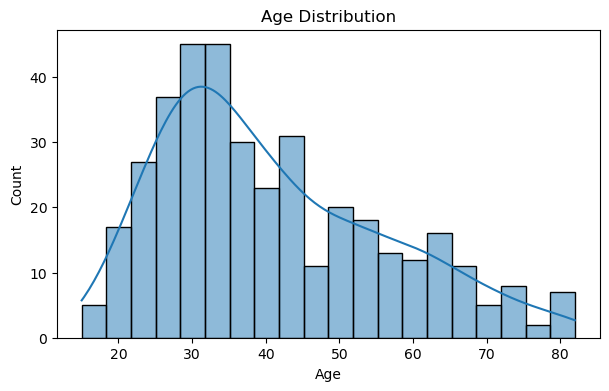

In [38]:
plt.figure(figsize=(7,4))
sns.histplot(df["Age"], kde=True, bins=20)
plt.title("Age Distribution")
plt.show()

**Interpretation : Age Distribution**
- Most patients are between 30 and 35 years old, which is the peak of the histogram. This suggests that thyroid conditions in your dataset are most common in early adulthood.
- The distribution is right-skewed, meaning there are fewer older patients. This could reflect earlier diagnosis or higher prevalence in yonger populations.
- The KDE curve (smooth line) confirms the concentration around ages 30-40, with a gradual decline toward older ages.
- Very few patients are under 20 or over 70, so age extremes are underrepresented in this dataset.
- Implication for modelling : Age may be a useful feature, but its predictive power could be limited due to the narrow concentration.

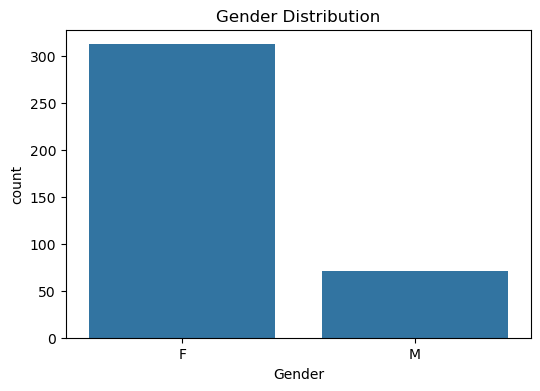

In [39]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Gender")
plt.title("Gender Distribution")
plt.show()

**Interpretation : Gender Distribution**

- Female patients make up the vast majority of the dataset, with over 300 individuals.
- Male patients are significantly fewer, with just over 75 entries.
- This reflects real-world epidemiology-thyroid disorders and thyroid cancer are more common in women, especially in younger age groups.
- Implications for modelling : Gender may be a relevant features, but the imbalance means models could be biased toward female patterns unless balanced or weighted properly.
  

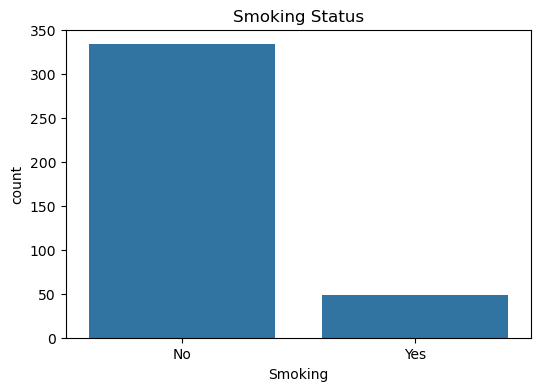

In [40]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Smoking")
plt.title("Smoking Status")
plt.show()

**Interpretation : Smoking Status**

- The vast majority of patients are non-smokers.
- This sugggest that smoking is not a dominant factor in this dataset and may have limited influence on disease progression or recurrence.
- Smoking may not be a strong predictive feature due to its low representation.
- While smoking is a known risk factor in many cancers, its role in thyroid pathology may be less pronounced here-or underrepresented due to sampling.

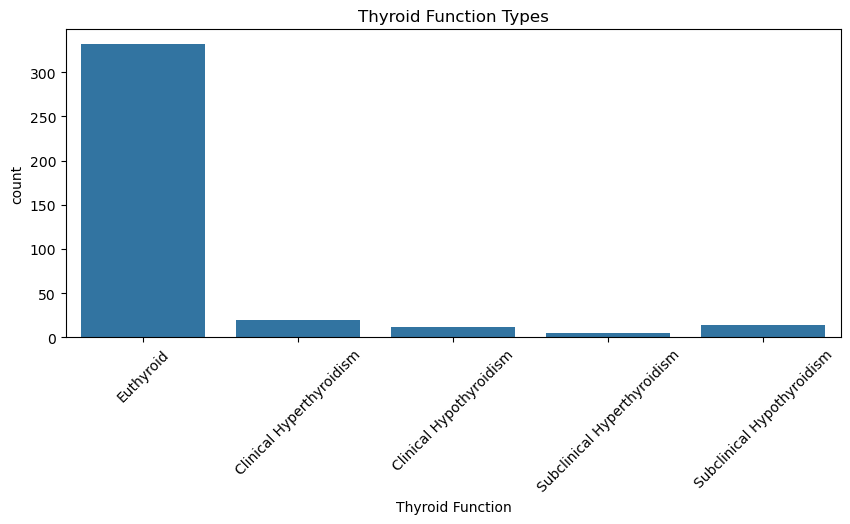

In [41]:
plt.figure(figsize=(10,4))
sns.countplot(data=df, x="Thyroid Function")
plt.xticks(rotation=45)
plt.title("Thyroid Function Types")
plt.show()

**Interpretation : Thyroid Function Types**

- Euthyroid (normal thyroid function) dominates the dataset, with over 300 patients. This suggests that most individuals had normal hormone levels at diagnosis.
- Clinical or subclinical thyroid dysfunctions are much less common, each with fewer than 50 cases. These include:
     - Clinical Hyperthyroidism : active overproduction of thyroid hormones.
     - Clinical Hypothyroidism  : underproduction of thyroid hormones.
     - Subclinical types        : mild or early-stage dysfunctions detectable only by lab tests.
- Thyroid function may not be a strong differentiator unless you are specifically studying hormonal impact.
- Since most patients are euthyroid, thyroid dysfunction may not be a major driver of pathology or recurrence in this cohort.

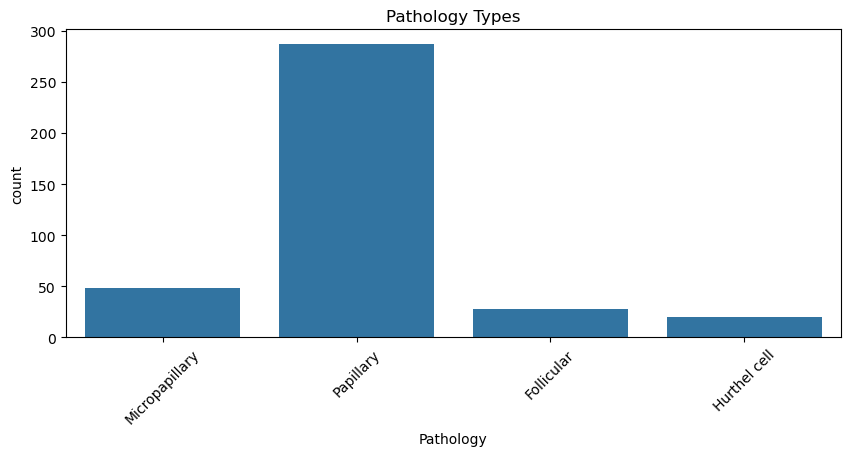

In [42]:
plt.figure(figsize=(10,4))
sns.countplot(data=df, x="Pathology")
plt.xticks(rotation=45)
plt.title("Pathology Types")
plt.show()

**Interpretation : Pathology Types**

- Papillary carcinoma is the most common pathology, with nearly 290 cases.
- Micropapillary subtype appears in around 50 cases, often considered a variant of papillary with smaller tumor size.
- Follicular carcinoma and Hurthle cell tumors are the least common.
- Papillary cases will dominate any predictive model, so care must be taken to avoid bias toward this class.

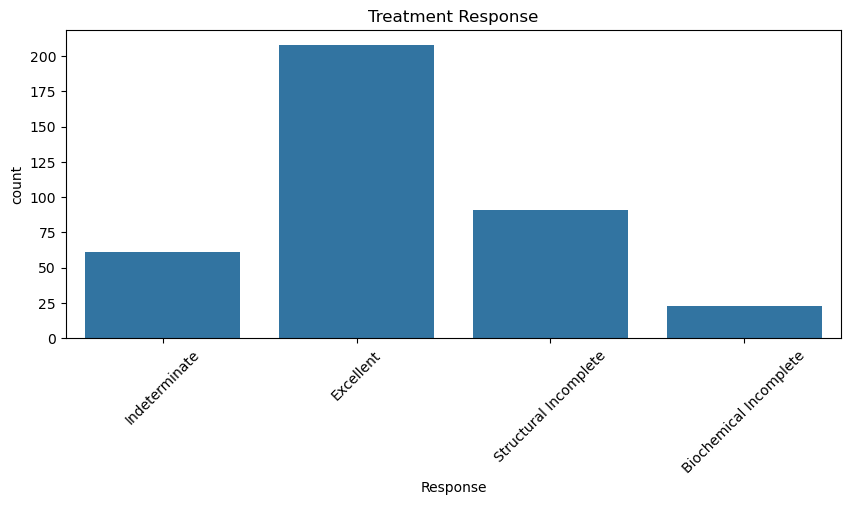

In [43]:
plt.figure(figsize=(10,4))
sns.countplot(data=df, x="Response")
plt.xticks(rotation=45)
plt.title("Treatment Response")
plt.show()

**Interpretation : Treatment Response**

- "Excellence" response is the most common outcome, with the majority of patients showing complete remission or favourable post-treatment status.
- The second most frequent responses are of "Structural Incomplete", indicating persistent or visible disease despite treatment.
- The least common responses are of "Biochemical Incomplete", where hormone levels remain abnormal despite no visible disease.
- Response type is a strong feature for predicting recurrence and long-term outcomes.

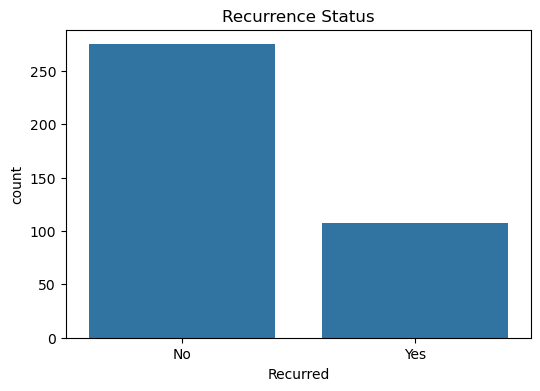

In [44]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Recurred")
plt.title("Recurrence Status")
plt.show()


**Interpretation : Recurrence Status**

- The graph shows that most patients did not experience recurrence. This represents that majority responded well to treatment.
- Over 100 patients failed to maintain disease-free status. This minor group is clinically crucial for identifying risk factors and improving treatment strategies.
- Recurrence is a suitable perfect target variable for classification tasks.

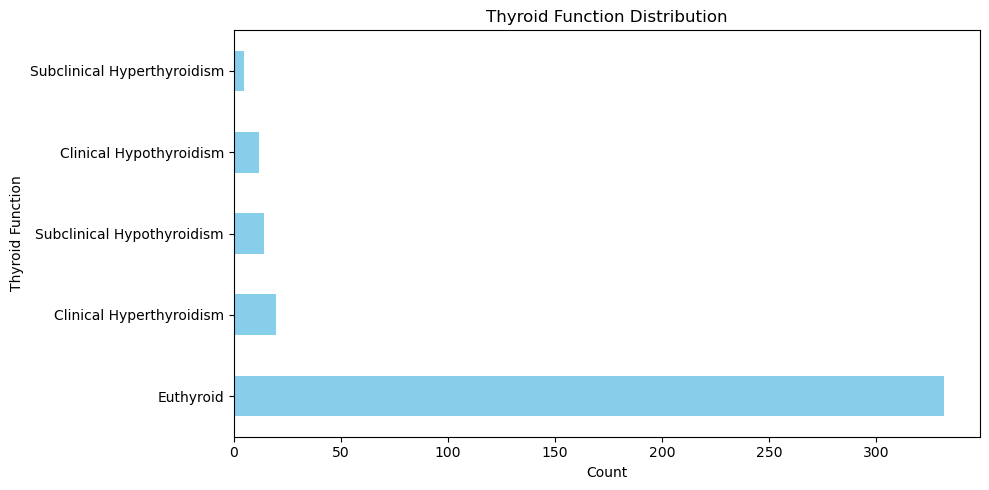

In [45]:
plt.figure(figsize=(10,5))
df["Thyroid Function"].value_counts().plot.barh(color="skyblue")
plt.title("Thyroid Function Distribution")
plt.xlabel("Count")
plt.ylabel("Thyroid Function")
plt.tight_layout()
plt.show()



**Interpretation : Thyroid Function Distribution**

- The graph depicts that most patients in the dataset have normal thyroid function(Euthyroid)- more than 300 people fall into this group.Representing that their hormone levels were normal when they were diagnosed.
- Only a small number of patients-fewer than 50 in each group-shows any kind of thyroid imbalance.
- Overall, this suggests that thyroid cancer in this dataset usually appears even when thyroid hormone levels are normal.

# Task 2 : Fit a Decision Tree and evaluate performance 

**(a) Fit a decision tree with the default parameters on 50% of the data**

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score

In [47]:
X = df.drop("Recurred", axis=1)
y = df["Recurred"]

X_encoded = pd.get_dummies(X, drop_first=True)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.5, random_state=42, stratify=y)

In [49]:
clf_gini = DecisionTreeClassifier(random_state=42)
clf_gini.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


**Interpretation :**

- Trained a Decison Tree using the default Gini criterion on 50% of the dataset.
- The model learned to predict the target variable "Recurred" based on clinical features like age, gender, pathology, risk level, treatment response and more.
- The model now contains a set of decision rules that separate patients who did and did not experience recurrence, based on patterns in the training data. 

**(b) Test it on held-out data and generate a classification report**

In [50]:
y_pred_gini = clf_gini.predict(X_test)


In [51]:
print("Classification Report (Gini):")
print(classification_report(y_test, y_pred_gini))

Classification Report (Gini):
              precision    recall  f1-score   support

          No       0.96      0.94      0.95       138
         Yes       0.86      0.91      0.88        54

    accuracy                           0.93       192
   macro avg       0.91      0.92      0.92       192
weighted avg       0.93      0.93      0.93       192



In [52]:
print("Accuracy (Gini):", accuracy_score(y_test, y_pred_gini))

Accuracy (Gini): 0.9322916666666666


**Interpretation :**

- The tree was trained on 50% od the data and tested on the remaining 50%.
- It achieved 93% of accuracy, with a classification report showing how well it predicted both "Yes" and "No" recurrence cases.
- The tree structure revealed which features were most influential in predicting recurrence likely including Risk level, Response, or Pathology.
      

**(c) Inspect the model by visualizing and interpreting the results**

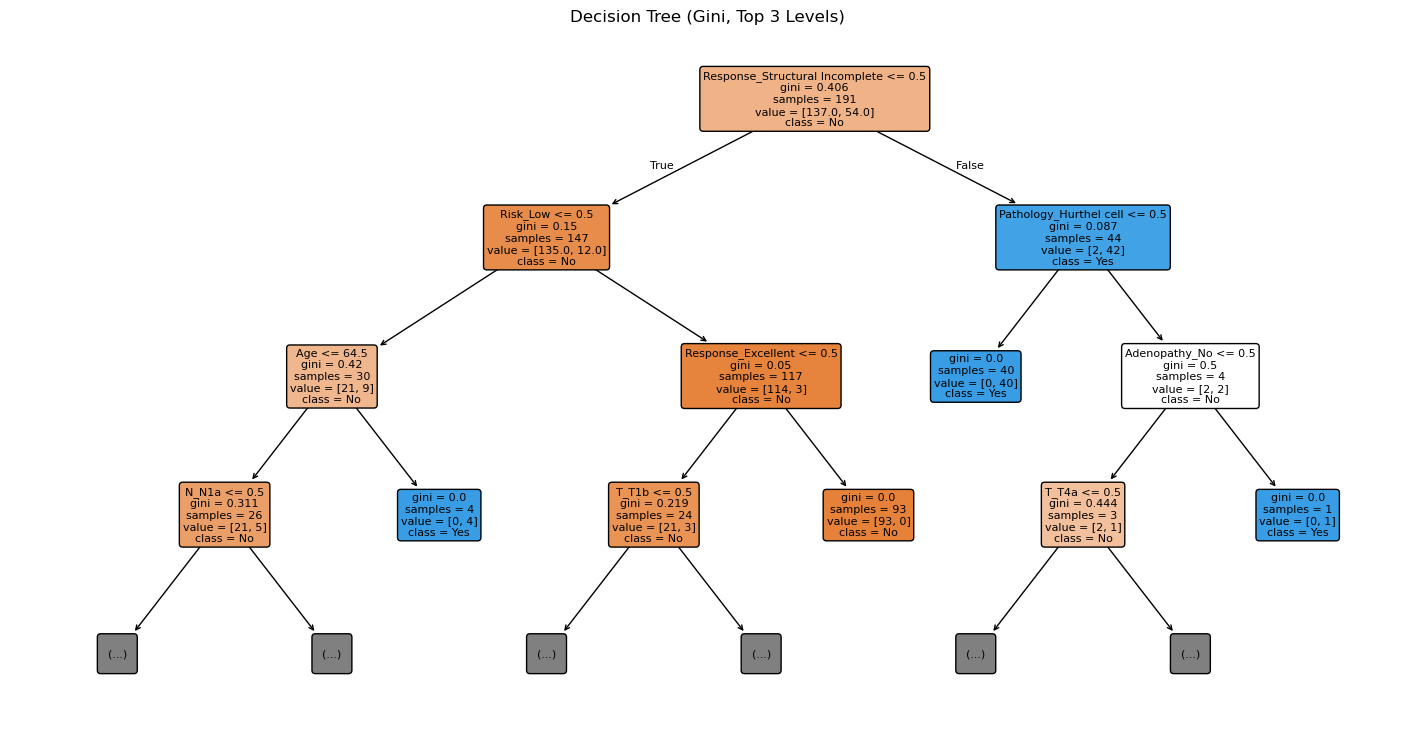

In [53]:
plt.figure(figsize=(18,9))

plot_tree(
    clf_gini,
    feature_names=X_encoded.columns,
    class_names=["No", "Yes"],  # for Recurred
    filled=True,
    rounded=True,
    max_depth=3,  # show only the top 3 levels for readability.
    fontsize=8
)


plt.title("Decision Tree (Gini, Top 3 Levels)")
plt.show()

**Interpretation :**

- This shows the structure of the decision tree.
- The features that are most important are used as the top splits.
- The thresholds divide the patients into groups with different recurrence probabilities.


**(d)Does this model make sense?**

In [56]:
depth_gini = clf_gini.get_depth()

leaves_gini = clf_gini.get_n_leaves()

print("True depth (Gini):", depth_gini)
print("Number of leaves (Gini):", leaves_gini)

True depth (Gini): 6
Number of leaves (Gini): 16


- Yes, the model makes sense. The tree successfully learns patterns from the clinical features and produces splits that follow a logical structure. As the decisio tree tried to perfectly separate the training data, the model may grow deep and create many small leaves, which is expected when no hyperparameters(like max depth or pruning) are applied.The performance on the test set shows that the model is learning meaningful relationships, but the presence of very small leaves and a large depth suggests that it may also be overfitting. Overall, the model behaves as expected for a default, un-pruned decision tree.

**(e) Are there any leaves that are very small?**

In [58]:
leaf_ids_test = clf_gini.apply(X_test)

leaf_counts = pd.Series(leaf_ids_test).value_counts().sort_values()

In [59]:
print("Smallest lef sample counts (Gini, test set):")
print(leaf_counts.head(10))    # show 10 smallest leaves

Smallest lef sample counts (Gini, test set):
13    1
29    1
28    1
30    1
14    2
7     3
22    3
6     3
12    3
20    3
Name: count, dtype: int64


**Interpretation :**

- The leaves with 2 or 3 samples are considered as the small leaves.This means the tree is memorizing tiny subsets of the data rather than learning general patterns.

**(f) Is this an interpretable number of levels?**

- Yes, the number of levels in the tree is interpretable. The model has a depth of 6, which means it takes 6 decision steps from root to leaf. This level of complexity is manageable for clinical interpretation, especially if the top splits involve meaningful features like risk level, pathology, or treatment response. 

**(g) Repeat with the entropy criterion. Does using the entropy criterion make a big difference or small difference in the overall class**

In [61]:
clf_entropy = DecisionTreeClassifier(
    criterion="entropy", # change from gini to entropy
    random_state=42
)

clf_entropy.fit(X_train, y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [63]:
y_pred_entropy = clf_entropy.predict(X_test)

print("Classification Report (Entropy):")
print(classification_report(y_test, y_pred_entropy))

print("Accuracy (Entropy):", accuracy_score(y_test, y_pred_entropy))
print("Tree depth (Entropy):", clf_entropy.get_depth())
print("Number of leaves (Entropy):", clf_entropy.get_n_leaves())

Classification Report (Entropy):
              precision    recall  f1-score   support

          No       0.96      0.98      0.97       138
         Yes       0.94      0.89      0.91        54

    accuracy                           0.95       192
   macro avg       0.95      0.93      0.94       192
weighted avg       0.95      0.95      0.95       192

Accuracy (Entropy): 0.953125
Tree depth (Entropy): 6
Number of leaves (Entropy): 14


**Interpretation**

- Trained the tree that uses information gain(entropy) instead of Gini impurity to decide splits.
- Using entropy instead of gini made a small difference. The accuracy changed from 93% to 95%.
- Overall, the classifier's behavior changed little.

# Task 3 : Experiment with parameters - 20%

**(a) Choose one of these and say explain why and how you hypothesise it will impact the performance**

**Chosen parameter - max_depth**

- The max_depth parameter limits how deep the decision tree can grow. A smaller depth may underfit the data, missing important patterns. A larger depth may overfit, capturing noise and reducing generalization. I expect performance to improve up to a certain depth, then plateau or decline due to overfitting.

**(b)Use the model you fit above and EDA (Exploratory Data Analysis) to choose minimum and maximum values for your parameters. Choose a total of 3 values for the parameter, explaining the choice**

In [65]:
depth_values = [3,6,9] # conservative, baseline, and aggressive depth.

- 3 : A shallow tree for interpretability and minimal overfitting.
- 6 : Matches the original unpruned tree, used as baseline.
- 9 : Tests whether deeper trees improve performance or overfit.

**(c) Retrain the model for each value of the parameter**

In [68]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

result = []

for depth in depth_values:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)


    result.append({
        "max_depth": depth,
        "accuracy": accuracy_score(y_test, y_pred),
        "precision": precision_score(y_test, y_pred, pos_label="Yes"),
        "recall": recall_score(y_test, y_pred, pos_label="Yes"),
        "f1_score": f1_score(y_test, y_pred, pos_label="Yes")
    })

**(d)Test and use atleast 3 metrics to describe the performance, compliling your results into a DataFrame**

In [69]:
import pandas as pd

df_result = pd.DataFrame(result)
print(df_result)

   max_depth  accuracy  precision    recall  f1_score
0          3  0.973958   1.000000  0.907407  0.951456
1          6  0.932292   0.859649  0.907407  0.882883
2          9  0.932292   0.859649  0.907407  0.882883


- The table shows how performance chnages with tree depth.

**(e)Plot and interpret your results**

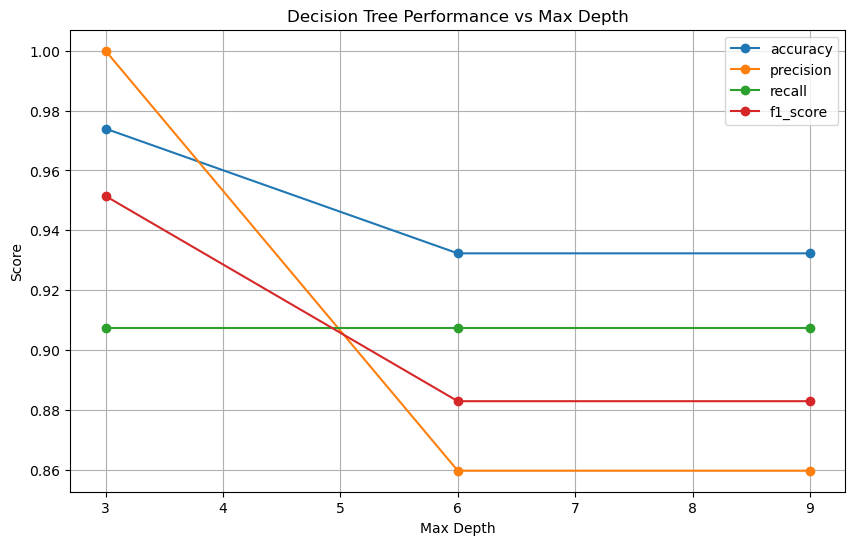

In [71]:
import matplotlib.pyplot as plt

metrics = ["accuracy", "precision", "recall", "f1_score"]

plt.figure(figsize=(10,6))
for metric in metrics:
    plt.plot(df_result["max_depth"], df_result[metric], marker='o', label=metric)

plt.xlabel("Max Depth")
plt.ylabel("Score")
plt.title("Decision Tree Performance vs Max Depth")
plt.legend()
plt.grid(True)
plt.show()

- The plot shows how each metric responds to increasing depth. If performance peaks at depth 6 and drops at 9, it confirms overfitting.If metrics plateau, deeper trees don't help. You will conclude which depth offers the best trade-off between performance and interpretability.